In [1]:
import GetOldTweets3 as got
import datetime
import time
from random import uniform
from tqdm import tqdm_notebook
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def day():
    global days_range
    days_range = []
    start_input = input()
    end_input = input()
    start = datetime.datetime.strptime(start_input, "%Y-%m-%d")
    end = datetime.datetime.strptime(end_input, "%Y-%m-%d")
    date_generated = [start + datetime.timedelta(days=x) for x in range(0, (end-start).days)]
    
    for date in date_generated:
        days_range.append(date.strftime("%Y-%m-%d"))
        
    print("=== 설정된 트윗 수집 기간은 {} 에서 {} 까지 입니다 ===".format(days_range[0], days_range[-1]))
    print("=== 총 {}일 간의 데이터 수집 ===".format(len(days_range)))

In [3]:
def tweetCriteria():
    global tweet
    
    # 수집 기간 맞추기
    start_date = days_range[0]
    end_date = (datetime.datetime.strptime(days_range[-1], "%Y-%m-%d")
               + datetime.timedelta(days=1)).strftime("%Y-%m-%d")
    
    # 트윗 수집 기준 정의
    search_input = input()
    tweetCriteria = got.manager.TweetCriteria().setQuerySearch(search_input)\
                                           .setSince(start_date)\
                                           .setUntil(end_date)\
                                           .setMaxTweets(-1)
    print("Collecting data start.. from {} to {}".format(days_range[0], days_range[-1]))
    start_time = time.time()
    
    tweet = got.manager.TweetManager.getTweets(tweetCriteria)
    
    # 수집 wirh GetOldTweet3
    print("Collecting data end.. {0:0.2f} Minutes".format((time.time() - start_time)/60))
    print("=== Total num of tweets is {} ===".format(len(tweet)))

In [4]:
# 변수 저장하기
# 유저 아이디, 트윗 링크, 트윗 내용, 날짜, 리트윗 수, 관심글 수 수집 가능
# 원하는 변수 골라서 저장하기
def crawling():
    #initialize
    global tweet_list
    tweet_list = []
    
    for index in tqdm_notebook(tweet):
        # 메타데이터 목록
        # username = index.username
        # link = index.permalink 
        content = index.text
        tweet_date = index.date.strftime("%Y-%m-%d")
        # tweet_time = index.date.strftime("%H:%M:%S")
        # retweets = index.retweets
        # favorites = index.favorites
        
        # 결과 합치기
        info_list = [tweet_date, content]
        tweet_list.append(info_list)
        
        # 휴식
        time.sleep(uniform(1,2))

In [6]:
day()
tweetCriteria()
crawling()

2019-08-07
2019-08-17
=== 설정된 트윗 수집 기간은 2019-08-07 에서 2019-08-16 까지 입니다 ===
=== 총 10일 간의 데이터 수집 ===
연애혁명
=== Total num of tweets is 288 ===


In [7]:
import pandas as pd

twitter_df = pd.DataFrame(tweet_list, 
                          columns = ["date", "text"])

twitter_df

,date,text
0,2019-08-16,"[주로 파는것] <카게프로&소아온 본진>은혼,고메,연애혁명,아메리카노 액소더스 [우..."
1,2019-08-16,연애혁명 보면서 내가 주인공이라도 된거 마냥 그 기분을 느끼자! 하고 연애혁명을 정...
2,2019-08-16,“어라-” “근데 청소는 건물 주변을 하는 거잖아요?” ( 두리번 두리번 ) 《소녀...
3,2019-08-16,"성공한 덕후, 귀곡의 문, 모죠의 일지, 옆반의 인어, 허니버니, 오라존미, 자취로..."
4,2019-08-16,연애혁명 포기못해 나는 아람이를 사랑해..
5,2019-08-16,5. 아메리카노 엑소더스 연애혁명이 제 인생 첫 웹툰이고(5학년때) 이게 두번째 웹...
6,2019-08-16,8. 동복 연애혁명꺼랑 존똑임
7,2019-08-16,연애혁명 이두나 좋아하는부분 걸어서30분 화장지워주는남자 개를낳았다 식스틴 내여자친...
8,2019-08-16,근데 레진 <여자친구>는 현실적이면서 개성적인 여자캐릭터들이 많았는데 <연애혁명>은...
9,2019-08-16,오아람 왕자림 캐릭터는 나쁘지 않은데 사실 저 연애혁명 전체적으로 남캐든 여캐든 너...


2019-08-07    48
2019-08-08    34
2019-08-09    23
2019-08-10    23
2019-08-11    21
2019-08-12    16
2019-08-13    12
2019-08-14    25
2019-08-15    64
2019-08-16    22
Name: date, dtype: int64


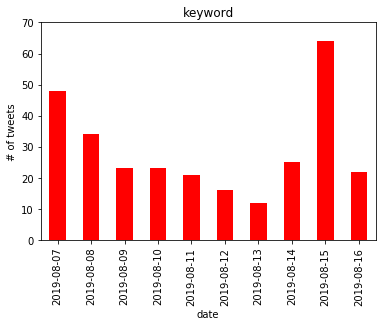

In [13]:
# 데이터 통계 확인
# 키워드 빈도 분석하기

def get_keywords(dataframe):
    keywords = []
    text = dataframe["text"].lower()
    if "연애혁명" in text:
        keywords.append("연애혁명")
    if "왕자림" in text:
        keywords.append("왕자림")
    if "공주영" in text:
        keywords.append("공주영")
    if "양민지" in text:
        keywords.append("양민지")
    if "이경우" in text:
        keywords.append("이경우")
    return ",".join(keywords)

twitter_df["keyword"] = twitter_df.apply(get_keywords, axis=1)

# barplot 그리기

import matplotlib.pyplot as plt

counts = twitter_df["date"].value_counts().sort_index()

plt.title("keyword")
plt.ylabel("# of tweets")
plt.xlabel("date")
plt.ylim(0,70)
counts.plot(kind = 'bar', color='red')
print(counts)